In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mstats
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler

In [2]:
# pip install sql
!pip install ipython-sql


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
df = pd.read_csv("/Users/meikimura/Downloads/housing_prices_project.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [15]:
cnn = sqlite3.connect('housing_prices_project.db')
df.to_sql('housing_project', cnn)

NameError: name 'sqlite3' is not defined

In [4]:
# Get the shape of the data
print(df.shape)

(1460, 81)


In [5]:
# Get information about the columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
%load_ext sql

In [7]:
%sql sqlite:///housing_prices_project.db

In [8]:
#Answer the following questions in both Python and SQL, the results should return the same.

In [9]:
# Question 1: How many houses were sold per year? 

In [16]:

%%sql

SELECT 
    YrSold, COUNT (YrSold) as avg_sales
FROM 
    housing_project
GROUP BY 
    YrSold
ORDER BY 
    YrSold ASC

 * sqlite:///housing_prices_project.db
(sqlite3.OperationalError) no such table: housing_project
[SQL: SELECT 
    YrSold, COUNT (YrSold) as avg_sales
FROM 
    housing_project
GROUP BY 
    YrSold
ORDER BY 
    YrSold ASC]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [11]:
# Python

# Convert the 'YrSold' column to datetime type (if not already)
#df['YrSold'] = pd.to_datetime(df['YrSold'], format='%Y')

# Extract the year from the 'YrSold' column and count the occurrences
year_counts = df['YrSold'].value_counts()

# Print the result
print(year_counts)

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64


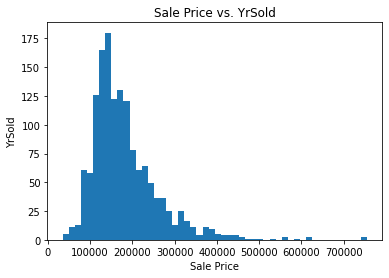

In [12]:
#Histogram
plt.hist(df['SalePrice'], bins=50)
plt.xlabel('Sale Price')
plt.ylabel('YrSold')
plt.title('Sale Price vs. YrSold')
plt.show()

In [ ]:
# Question 2: What is the percentage of houses with garages that were built after the original house?

In [1]:
#SQL
%%sql
WITH a AS (
    SELECT
        COUNT(*) as n_houses
    FROM
        housing_project
),

l AS (
    SELECT
        COUNT(*) as n_houses_w_garage_later
    FROM
        housing_project
    WHERE
        CAST(YearBuilt AS string) < GarageYrBlt
        AND
        GarageYrBlt <> 'NA'
)

SELECT
    a.n_houses,
    l.n_houses_w_garage_later,
    a.n_houses - l.n_houses_w_garage_later as n,
    ROUND(100.0 * l.n_houses_w_garage_later / a.n_houses, 1) as rate_houses_w_garage_later
FROM
    a
CROSS JOIN
    l


SyntaxError: invalid syntax (3198264652.py, line 3)

In [15]:
#Python

# Assuming 'data' is the name of your DataFrame
df = df.copy()

# Replace 'NA' with NaN, and then fill NaN with 0
df['GarageYrBlt'] = df['GarageYrBlt'].replace('NA', pd.NA).fillna(0).astype(int)

# Find the number of matching rows
matching_rows = df[df['GarageYrBlt'] > df['YearBuilt']]

# Calculate the percentage of matching rows
percentage = round((len(matching_rows) / len(df)) * 100, 1)

# Display the percentage
print(f"Percentage of matching years: {percentage}%")

Percentage of matching years: 19.2%


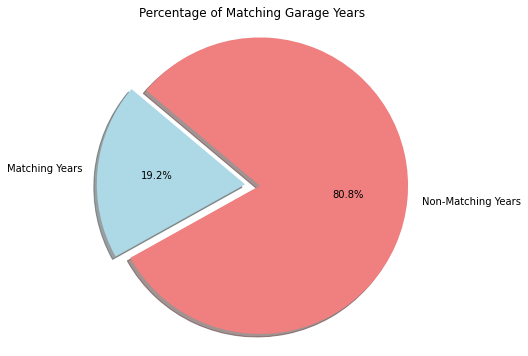

In [16]:
#Pie Chart
labels = ['Matching Years', 'Non-Matching Years']
sizes = [percentage, 100 - percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the matching years slice

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title('Percentage of Matching Garage Years')

plt.show()